# Further exploring the data by building on top of original Data Exploration
## Here the first version of the pickle file of the master dataset is produced
Note: A significant portion of this notebook involves showing the head or info of each dataframe/dataset

### 6 Data Files
- Bom Movie Gross Info as CSV
- IMDB Database w/ 8 Tables: directors, known_for, movie_akas, move_basics, movie_ratings, person, principals, writers
- Rotten Tomatoes (RT) Movie Info as TSV
- Rotten Tomatoes (RT) Reviews as TSV
- The Movie Database (TMDB) as CSV
- The Numbers (TN) Movie Budgets as CSV

In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3
from zipfile import ZipFile # for unzipping the db.zip file
pd.set_option('display.max_columns', None) # show all columns when printing out dataframe
%matplotlib inline

### Opening the Files

### Bom Movie Gross Info

#### The data set comprises of 3387 movies with title, studio, domestic_gross, foreign_gross, release year

In [8]:
bom_gross_df = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
bom_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
bom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:
bom_gross_df['studio'].value_counts()[:22]

IFC       166
Uni.      147
WB        140
Magn.     136
Fox       136
SPC       123
Sony      110
BV        106
LGF       103
Par.      101
Eros       89
Wein.      77
CL         74
Strand     68
FoxS       67
RAtt.      66
KL         62
Focus      60
WGUSA      58
CJ         56
MBox       54
UTV        50
Name: studio, dtype: int64

In [11]:
bom_gross_df['year'].value_counts()

2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: year, dtype: int64

## Rotten Tomatoes Movie Info 

#### The data set comprises 1560 movies, which are labeled with an id instead of movie name. 

#### There are 11 columns: id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio

In [12]:
rt_movie_info_df = pd.read_csv('../zippedData/rt.movie_info.tsv.gz', delimiter='\t')
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [13]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Separate dataframe that includes only the rows that have theater_date (and converted to datetime)

In [14]:
rt_movie_info_if_date_exists = rt_movie_info_df.dropna(subset=['theater_date']).copy()
rt_movie_info_if_date_exists['datetime_theater_date'] = pd.to_datetime(rt_movie_info_if_date_exists['theater_date'], format='%b %d, %Y')
rt_movie_info_if_date_exists['datetime_dvd_date'] = pd.to_datetime(rt_movie_info_if_date_exists['dvd_date'], format='%b %d, %Y')

rt_movie_info_if_date_exists[['datetime_theater_date', 'datetime_dvd_date']].head()

,datetime_theater_date,datetime_dvd_date
0,1971-10-09,2001-09-25
1,2012-08-17,2013-01-01
2,1996-09-13,2000-04-18
3,1994-12-09,1997-08-27
5,2000-03-03,2000-07-11


## Rotten Tomatoes Reviews Info 

#### The data set comprises 54432 reviews, with id's that appear to correspond to the movies in rt_movie_info_df. 

#### There are 11 columns: id, review, rating, fresh, critic, top_critic, publisher, date

Converting dates to datetime

In [15]:
rt_reviews_df = pd.read_csv('../zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='unicode_escape')
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [16]:
# every row has a date in this table, so there is no need to drop any data
rt_reviews_df['datetime_date'] = pd.to_datetime(rt_reviews_df['date'], format='%B %d, %Y')

In [17]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             54432 non-null  int64         
 1   review         48869 non-null  object        
 2   rating         40915 non-null  object        
 3   fresh          54432 non-null  object        
 4   critic         51710 non-null  object        
 5   top_critic     54432 non-null  int64         
 6   publisher      54123 non-null  object        
 7   date           54432 non-null  object        
 8   datetime_date  54432 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 3.7+ MB


Number of reviews for each movie id

In [18]:
rt_reviews_df['id'].value_counts()

782     338
1067    275
1525    262
1777    260
1083    260
       ... 
28        1
102       1
348       1
476       1
1727      1
Name: id, Length: 1135, dtype: int64

## The Movie Database Info

#### The data set comprises 26517 rows of movies defined by id and original_title, but there are multiple rows of the same id and/or original_title, so there needs to be some data cleaning to merge information or remove duplicates

#### There are 10 columns: 'Unnamed: 0', genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count

#### Additional Notes
- There is an 'Unnamed: 0' column that seems to have been a row id that we can clean up
- The types of some of the columns needs changing
    - genre_ids needs to be converted to a list
    - release_date needs to be datetime

In [19]:
tmdb_movies_df = pd.read_csv('../zippedData/tmdb.movies.csv.gz', index_col = 0)
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [20]:
def col_str(col):
    # Input: column (genre_ids) as a string of a list to see if it consists of no genre_id's -> ('[]')
    # Or if it consists of a list of genre ids as a string -> '[#, #, #]'
    # Returns: np.nan if empty list or list of integers if list with values
    
    if col == '[]':
        return np.nan
    else:
        return [int(x) for x in col.replace('[','').replace(']', '').split(',')]

Converting the genre_ids column to a list of genre ids or an np.nan value and then dropping rows that have nan.

We want to only keep rows with genre ids because we want to primarily use that information in deciding what type of movies to make.

In [21]:
tmdb_movies_df['genre_ids'] = tmdb_movies_df['genre_ids'].apply(col_str)
tmdb_movies_df = tmdb_movies_df.dropna(subset=['genre_ids'])

In [22]:
# get list of unique numbers in the genre_ids
all_numbers = []
for x in tmdb_movies_df['genre_ids']:
    all_numbers += x

all_numbers = sorted(list(set(all_numbers)))

In [23]:
# create columns corresponding to the unique genre ids and populate with False
tmdb_movies_df[all_numbers] = False

In [24]:
# If the genre id corresponds to the movie, then the corresponding genre id column is populated with True
for idx, l in enumerate(tmdb_movies_df['genre_ids']):
    for x in l:
        tmdb_movies_df.at[idx, x] = True

In [25]:
# Columns with genre id as the name are converted to the genre name instead
col_rename = {28:'Action', 12:'Adventure', 16:'Animation', 35:'Comedy', 80:'Crime', 99:'Documentary', 
              18:'Drama',10751:'Family', 14:'Fantasy', 36:'History', 27:'Horror', 10402:'Music', 9648:'Mystery',
              10749:'Romance', 878:'Science Fiction', 10770:'TV Movie', 53:'Thriller', 10752:'War', 37:'Western'}

tmdb_movies_df.rename(columns=col_rename, inplace=True)

In [26]:
# release_date is converted to datetime format
tmdb_movies_df['release_date'] = pd.to_datetime(tmdb_movies_df['release_date'], format='%Y-%m-%d')

Printing out the frequency of each genre

In [27]:
tmdb_movies_df[col_rename.values()].sum().astype(int).sort_values(ascending=False)

Drama              8297
Comedy             5652
Documentary        4960
Thriller           4205
Horror             3680
Action             2612
Romance            2321
Science Fiction    1762
Family             1565
Crime              1510
Animation          1486
Adventure          1400
Music              1267
Mystery            1235
Fantasy            1139
TV Movie           1084
History             621
War                 330
Western             205
dtype: int64

In [28]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26407 entries, 0 to 23797
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          24038 non-null  object        
 1   id                 24038 non-null  float64       
 2   original_language  24038 non-null  object        
 3   original_title     24038 non-null  object        
 4   popularity         24038 non-null  float64       
 5   release_date       24038 non-null  datetime64[ns]
 6   title              24038 non-null  object        
 7   vote_average       24038 non-null  float64       
 8   vote_count         24038 non-null  float64       
 9   Adventure          24184 non-null  object        
 10  Fantasy            24158 non-null  object        
 11  Animation          24180 non-null  object        
 12  Drama              24888 non-null  object        
 13  Horror             24386 non-null  object        
 14  Action

In [29]:
# There seem to be movies repeated or multiple movies with the same title
tmdb_movies_df['original_title'].value_counts()

Truth or Dare                                      5
Legend                                             5
Eden                                               5
Lucky                                              5
Home                                               4
                                                  ..
Ang Larawan                                        1
Trump: The Art of the Insult                       1
Divine Access                                      1
Yes - Like It Is - Live At The Mesa Arts Center    1
Roulette                                           1
Name: original_title, Length: 22478, dtype: int64

## The Numbers Movie Budgets Info

#### The data set comprises 5782 rows of movie budgets. There does not appear to be a clear primary key, but the combination of movie and release_date can be used instead. 

#### There are 6 columns: id, release_date, movie, production_budget, domestic_gross, worldwide_gross

#### Additional Notes
- The ids cycle from 1 to 100 then reset as the columns go down
- There are many instances of repeated movie titles (such as King Kong's release from 3 different years)
- movie + release_date are unique identifiers for the rows

In [30]:
tn_movie_budgets = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [31]:
# Converting release_date to datetime type
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'], format='%b %d, %Y')

In [32]:
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str[1:].str.replace(',','').astype(int)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str[1:].str.replace(',','').astype(int)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str[1:].str.replace(',','').astype(int)

In [33]:
#Created new column 'worldwide profit' by subtracting production_budget from worldwide_gross
tn_movie_budgets['worldwide_profit'] = (tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget'])

# Created new column 'profit_budget_ratio' to show production_budget : worldwide_profit
tn_movie_budgets['ROI'] = (tn_movie_budgets['worldwide_profit'] / tn_movie_budgets['production_budget'])

tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696


In [34]:
# tn_movie_budgets = tn_movie_budgets.sort_values(by=['profit_budget_ratio'], ascending=False)

In [35]:
#removing movie
tn_movie_budgets = tn_movie_budgets[tn_movie_budgets['worldwide_gross'] != 0]

In [36]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696


### Making a new df merging tmdb and tn movie data

In [38]:
tn_budgets_with_tmdb_genres_df = tn_movie_budgets.merge(tmdb_movies_df, how='inner', left_on='movie', 
                                                        right_on='original_title')

In [39]:
tn_budgets_with_tmdb_genres_df.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,Adventure,Fantasy,Animation,Drama,Horror,Action,Comedy,History,Western,Thriller,Crime,Documentary,Science Fiction,Mystery,Music,Romance,Family,War,TV Movie
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577,"[28, 12, 14, 878]",19995.0,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676.0,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673,"[12, 28, 14]",1865.0,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571.0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
2,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841,"[28, 12, 878]",99861.0,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114,"[12, 28, 14]",299536.0,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
4,9,2017-11-17,Justice League,300000000,229024295,655945209,355945209,1.186484,"[28, 12, 14, 878]",141052.0,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [40]:
# There are either 57 or 58 rows corresponding to each id
tn_budgets_with_tmdb_genres_df['movie'].value_counts()

Legend                                 10
The Gift                                8
Home                                    8
Truth or Dare                           5
The Square                              4
                                       ..
Into the Storm                          1
X-Men: Apocalypse                       1
Leaves of Grass                         1
Closer to the Moon                      1
The Hobbit: The Desolation of Smaug     1
Name: movie, Length: 1728, dtype: int64

In [35]:
# print(plt.style.available)
# plt.style.use('seaborn-white')
# mpl.rcParams.update(mpl.rcParamsDefault)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Scatter Plots
#### 1. Production budget vs. ROI (2 plots)
#### 2. Worldwide gross vs. productions

(1000000.0, 500000000.0)

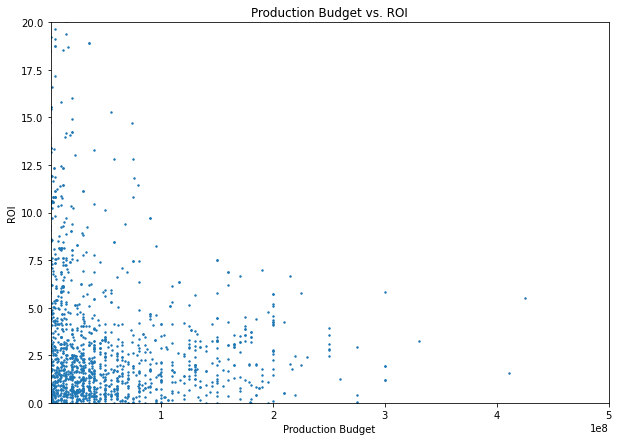

In [44]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(tn_budgets_with_tmdb_genres_df['production_budget'],tn_budgets_with_tmdb_genres_df['ROI'], 2)
ax.set_title('Production Budget vs. ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('ROI')
plt.ylim([0,20])
plt.xlim([1e6,5e8])

(1000000.0, 500000000.0)

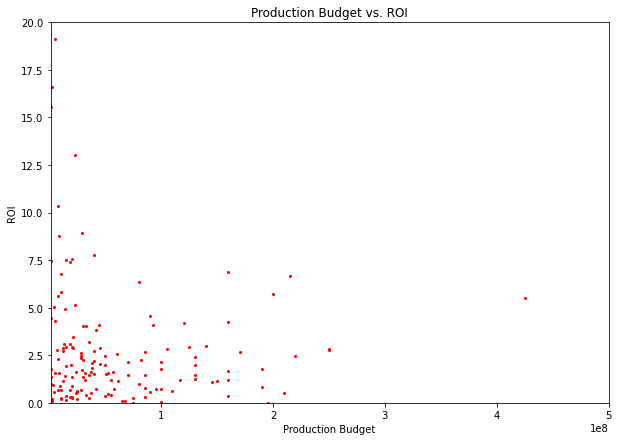

In [45]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(tn_budgets_with_tmdb_genres_df[tn_budgets_with_tmdb_genres_df['Action'] == True]['production_budget'],
           tn_budgets_with_tmdb_genres_df[tn_budgets_with_tmdb_genres_df['Action'] == True]['ROI'], 4, color='red')
ax.set_title('Production Budget vs. ROI')
ax.set_xlabel('Production Budget')
ax.set_ylabel('ROI')
plt.ylim([0,20])
plt.xlim([1e6,5e8])

(1000000.0, 500000000.0)

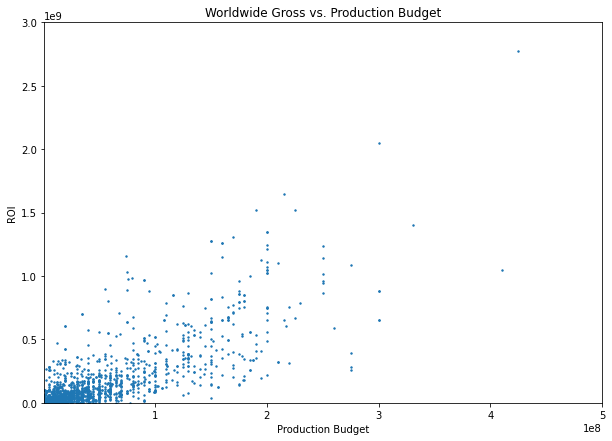

In [46]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(tn_budgets_with_tmdb_genres_df['production_budget'],tn_budgets_with_tmdb_genres_df['worldwide_gross'], 2)
ax.set_title('Worldwide Gross vs. Production Budget')
ax.set_xlabel('Production Budget')
ax.set_ylabel('ROI')
plt.ylim([0, 3e9])
plt.xlim([1e6, 5e8])

## IMDB Database Info

#### The database consists of 8 tables: movie_basics, directors, known_for, movie_akas, movie_ratings, person, principals, writers

In [47]:
data_dirs = ! ls ../zippedData/
data_dirs = list(data_dirs)
if 'im.db' not in data_dirs: # checks to see if im.db is unzipped. Unzips it in zippedData if not
    zip_imdb = ZipFile('../zippedData/im.db.zip', 'r')
    zip_imdb.extractall(path='../zippedData/')

conn = sqlite3.connect('../zippedData/im.db') # getting connector for im.db

In [48]:
pd.read_sql("""SELECT name FROM sqlite_master  
  WHERE type='table';""", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [49]:
pd.read_sql(""" SELECT * FROM movie_basics""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [50]:
pd.read_sql(""" SELECT * FROM directors""", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [51]:
pd.read_sql(""" SELECT * FROM known_for""", conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [52]:
pd.read_sql(""" SELECT * FROM movie_akas""", conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [53]:
pd.read_sql(""" SELECT * FROM movie_ratings""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [54]:
pd.read_sql(""" SELECT * FROM persons""", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [55]:
pd.read_sql(""" SELECT * FROM principals""", conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [56]:
pd.read_sql(""" SELECT * FROM writers""", conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


## Using the imdb data to create a df with budget, people, and genres
#### Exporting database information as - primary_title, person_name, professions

In [57]:
no_genre = ("""
SELECT primary_title as movie_name, start_year AS db_release_year, primary_name as person_name, principals.category as movie_role, genres
FROM movie_basics
JOIN principals
USING(movie_id)
JOIN persons
USING(person_id)
WHERE genres is not null
""")

movie_role_genre_df = pd.read_sql(no_genre, conn)

#### Function that turns string of list of genres into list of genres as strings

In [61]:
def col_str_for_db(col):
    # Input: column (genre_ids) as a string of a list to see if it consists of no genre_id's -> ('[]')
    # Or if it consists of a list of genre ids as a string -> '[#, #, #]'
    # Returns: np.nan if empty list or list of integers if list with values
    return [x for x in col.split(',')]

#### Turning the genres column from string of list to list of strings

In [62]:
movie_role_genre_df['genre'] = movie_role_genre_df['genres'].apply(lambda x : [y for y in x.split(',')])

In [63]:
all_genres = []
for x in movie_role_genre_df['genre']:
    all_genres += x

all_genres = sorted(list(set(all_genres)))

#### Creating columns of boolean values for each genre and setting them to False

In [64]:
movie_role_genre_df[all_genres] = False

#### Setting True the genres that correspond to each movie

In [65]:
for idx, l in enumerate(movie_role_genre_df['genre']):
    for x in l:
        movie_role_genre_df.at[idx, x] = True

#### Dropping the genres and genre columns as they are no longer needed

In [66]:
movie_role_genre_df.drop(labels=['genres', 'genre'], axis=1, inplace=True)

### Cleaning up The Numbers dataframe

In [67]:
tn_movie_budgets = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz').drop(labels='id', axis=1)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [68]:
# Converting release_date to datetime type
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'], format='%b %d, %Y')

In [69]:
# Fixing the production budget, domestic gross, and worldwide gross columns
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str[1:].str.replace(',','').astype(int)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str[1:].str.replace(',','').astype(int)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str[1:].str.replace(',','').astype(int)

In [70]:
#Created new column 'worldwide profit' by subtracting production_budget from worldwide_gross
tn_movie_budgets['worldwide_profit'] = (tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget'])

# Created new column 'profit_budget_ratio' to show production_budget : worldwide_profit
tn_movie_budgets['ROI'] = (tn_movie_budgets['worldwide_profit'] / tn_movie_budgets['production_budget'])

tn_movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,ROI
0,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,1.546673
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-0.572108
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,3.243841
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,3.153696


In [71]:
# Adding a release year columns
tn_movie_budgets['release_year'] = tn_movie_budgets['release_date'].dt.year

In [72]:
# if we want to remove to remove movies that had no gross
# tn_movie_budgets = tn_movie_budgets[tn_movie_budgets['worldwide_gross'] != 0]

### Joining movie roles from imdb with the numbers dataframe on UNIQUE KEYS: Movie name and release year

In [73]:
db_and_budgets_df = tn_movie_budgets.merge(movie_role_genre_df, how='inner', left_on=['movie', 'release_year'], 
                                           right_on=['movie_name', 'db_release_year'])

#### Dropping the release years and movie name columns to reduce clutter

In [74]:
db_and_budgets_df.drop(labels=['release_year', 'db_release_year', 'movie_name'], axis=1, inplace=True)

### Sending to pickle file

In [142]:
db_and_budgets_df.to_pickle('movie_master_dataset.pkl')

### For future, can use this merge with the bom dataset to access studio data

In [75]:
bom_db_budgets_df = db_and_budgets_df.merge(bom_gross_df, how='inner', left_on='movie', right_on='title')

In [78]:
# Value counts for each studio
bom_db_budgets_df[['studio', 'movie', 'year', 'foreign_gross', 'domestic_gross_x']].drop_duplicates()['studio'].value_counts()[:22]

Uni.       113
Fox        103
WB          95
BV          70
Sony        68
Par.        66
LGF         53
FoxS        42
WB (NL)     37
Focus       32
Wein.       28
LG/S        26
SGem        23
ORF         23
Rela.       23
SPC         19
TriS        15
RAtt.       15
STX         14
A24         13
Sum.        11
IFC         10
Name: studio, dtype: int64